<a href="https://colab.research.google.com/github/Kaiziferr/machine_learning/blob/main/Probability_Calibration/02_Probability_Calibration_Model_Ensemble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install scikit-learn==1.5.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 28.1 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.0
    Uninstalling scikit-learn-1.6.0:
      Successfully uninstalled scikit-learn-1.6.0


In [2]:
import warnings

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification

from sklearn.calibration import (
    CalibratedClassifierCV,
    calibration_curve)

from sklearn.model_selection import (
    train_test_split, GridSearchCV)

from sklearn.metrics import brier_score_loss, accuracy_score

from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier

# **Info**
---

**@By:** Steven Bernal

**@Nickname:** Kaiziferr

**@Git:** https://github.com/Kaiziferr

The objective of this exercise is to validate the model calibration process when the focus is on probabilities. A ensemble binary classification model will be applied. The methods 'CalibratedClassifierCV', 'calibration_curve' and 'brier_score_loss' will be used. The calibrated model will be validated without adjustment, with adjustment, and without calibration.

# **Settings**
---

In [3]:
random_seed=12345
sns.set(style="darkgrid")
warnings.filterwarnings("ignore")

# **Data**
---

Synthetic data generate

In [4]:
def data_generator(**kward):
  X, y = make_classification(
      random_state = random_seed,
      **kward
  )
  return X, y

# **Calibration**
---

## **Model Eensemble**
---


**Data**

A synthetic dataset of 8000 records will be generated, with 10 features, of which 8 will be informative and 2 will be redundant. It will be a binary classification dataset, with a classification error rate of 8% and a separation of 0.01. The dataset is designed to be challenging for the XGBoost model, as it is very powerful, which is why the configuration that allows for this was sought

In [5]:
X, y = data_generator(
    **{
      "n_samples":8000,
      "n_features":10,
      "n_informative":8,
      "n_redundant":2,
      "n_classes":2,
      "flip_y":0.08,
      "class_sep":0.01
      }
)

**Data Split**

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=random_seed
)

**Model No Fit**

The model will be a 'ensemble' model and will not be trained. The model will is XGBoost. A XGBClassifier is instantiated with basic configurations and without fit. The configuration is 800 estimators, a learning rate of 0.01, and a gbtree booster.

In [7]:
model_xgb = XGBClassifier(
    n_estimators = 800,
    learning_rate = 0.01,
    booster = "gbtree",
)

The model's probabilities are calibrated using the 'CalibratedClassifierCV' function with 10 'cv' and the 'isotonic' method.

In [8]:
calibrate_model_xgb = CalibratedClassifierCV(
    estimator=model_xgb,
    method='isotonic',
    cv=10,
    ensemble=True
)
calibrate_model_xgb.fit(X_train, y_train)

CalibratedClassifierCV(cv=10,
                       estimator=XGBClassifier(base_score=None,
                                               booster='gbtree', callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.01, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=800, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...),
                       method='isotonic')

The test probabilities are obtained.

In [9]:
calibreated_probs_test = calibrate_model_xgb.predict_proba(X_test)

**Model Uncalibrated**

The previously configured, uncalibrated model is fitted. Then, probability predictions are made. This is done to compare the model's calibration


In [10]:
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

The test probabilities are obtained.

In [11]:
model_probs_test = model_xgb.predict_proba(X_test)

**Model-Fit**

In [12]:
calibrate_model_xgb_prefit = CalibratedClassifierCV(
    estimator=model_xgb,
    method='isotonic',
    cv="prefit",
    ensemble=True,
)
calibrate_model_xgb_prefit.fit(X_train, y_train)

CalibratedClassifierCV(cv='prefit',
                       estimator=XGBClassifier(base_score=None,
                                               booster='gbtree', callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=None,
                                               device=None,
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric=None,
                                               feature_types=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.01, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None,
                                               max_depth=None, max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=800, n_jobs=None,
                                               num_parallel_tree=None,
                                               random_state=None, ...),
                       method='isotonic')

The test probabilities are obtained.

In [13]:
calibreated_probs_test_prefit = calibrate_model_xgb_prefit.predict_proba(X_test)

Having the probabilities, a comparison is made between the calibrated model no-fit, the unicalibrated model and model fit

It will be assumed that class 1 is the class of interest.

One class or another, the number of selected 'bins' may be smaller, as those with no probability will collapse. To get a good idea of how many groups can be obtained, a histogram is used to determine how many bins are suitable for grouping the average probabilities. To be consistent in magnitude, the appropriate binning must be chosen, and it should be the same for all models.

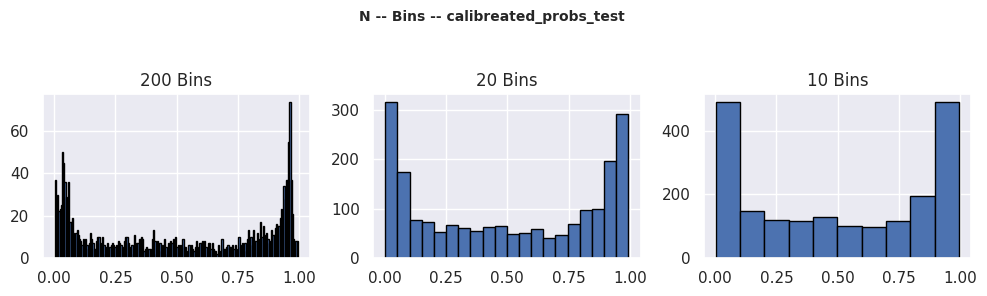

In [14]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3))
ax[0].hist(calibreated_probs_test[:,1], bins=200, edgecolor='black')
ax[0].set_title('200 Bins')

ax[1].hist(calibreated_probs_test[:,1], bins=20, edgecolor='black')
ax[1].set_title('20 Bins')
ax[2].hist(calibreated_probs_test[:,1], bins=10, edgecolor='black')
ax[2].set_title('10 Bins')
fig.tight_layout()
plt.subplots_adjust(top = 0.7)
fig.suptitle('N -- Bins -- calibreated_probs_test', fontsize = 10, fontweight = "bold");
plt.show()

- The number of 'bins' is set to 10, as a more accurate estimation can be obtained visually.

To be consistent with the visualization and comparison, the number 10 will be selected for the remaining functions to obtain a calibration curve.

In [15]:
prob_true_cali_target, prob_pred_cali_target = calibration_curve(y_test, calibreated_probs_test[:,1], n_bins=10)
prob_true_model_target, prob_pred_model_target = calibration_curve(y_test, model_probs_test[:,1], n_bins=10)
prob_true_cali_target_prefit, prob_pred_cali_target_prefit = calibration_curve(y_test, calibreated_probs_test_prefit[:,1], n_bins=10)

The difference between the predicted probability and the actual result of the previously adjusted calibrated model is very close to zero, which means the model is reliable and makes good predictions.

In [16]:
brier_score = brier_score_loss(y_test, calibreated_probs_test_prefit[:, 1])
brier_score

0.12978881088112335

The difference between the predicted probability and the actual outcome of the calibrated model is very close to zero, which means the model is reliable and making good predictions.

In [17]:
brier_score = brier_score_loss(y_test, calibreated_probs_test[:, 1])
brier_score

0.11852778925715637

However, the uncalibrated model also tends to be well-tuned, with the difference being minimal. This may suggest that it is not necessary to calibrate the model, with respect to the established configurations.

In [18]:
brier_score = brier_score_loss(y_test, model_probs_test[:, 1])
brier_score

0.128442497552773

This graph will allow the comparison of the real probability line versus the calibrated probability line for each of the models.

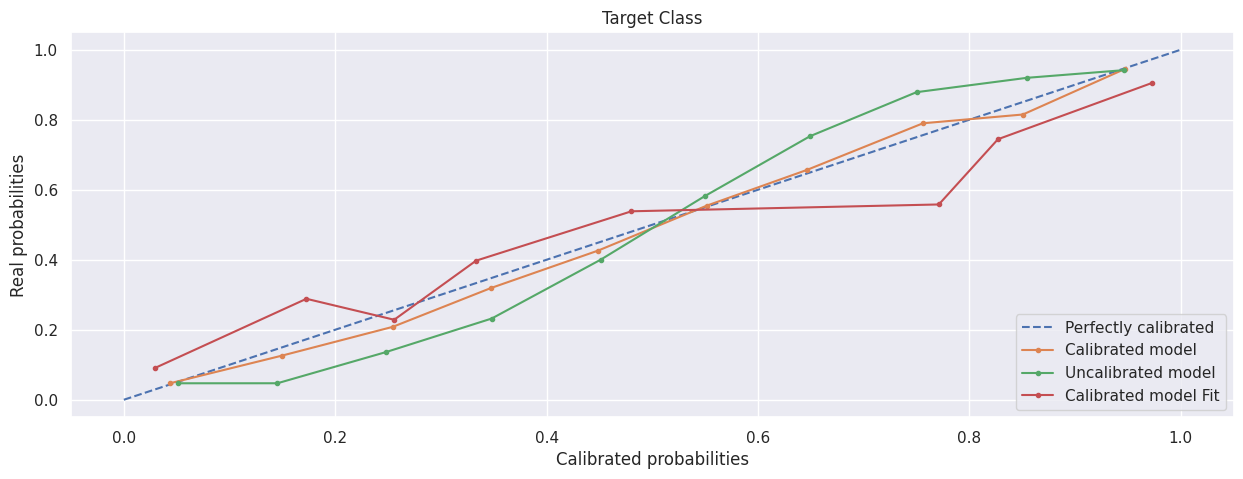

In [19]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 5))
plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly calibrated')
plt.plot(prob_pred_cali_target, prob_true_cali_target, marker='.', label='Calibrated model')
plt.plot(prob_pred_model_target, prob_true_model_target, marker='.', label='Uncalibrated model')
plt.plot(prob_pred_cali_target_prefit, prob_true_cali_target_prefit, marker='.', label='Calibrated model Fit')
plt.title("Target Class")
plt.legend(loc='lower right')
plt.xlabel('Calibrated probabilities')
plt.ylabel('Real probabilities')

plt.show()

The diagonal line is used as a reference to represent a perfectly calibrated model. The model closest to that perfection is the unadjusted but calibrated model Represented by the orange line.

For the next analysis, the most prominent probability points of each model will be examined.

The uncalibrated model (green line) is very close to the diagonal line, which means that calibration might not be necessary. However, some significant probability points will be described:

- For a group of records with a real probability of 0.047% of being the target class, the model might predict 14%. The model is overestimating the probability.

- For a group of records with a real probability of 88% of being the target class, the model might predict 75%. The model is underestimating the probability.

The calibrated model (orange line) is closer to the diagonal than the uncalibrated model. Some significant probability points are:

- For a group of records with a real probability of 20% of being the target class, the model might predict 25%. The model is overestimating the probability.

- For a group of records with a real probability of 78% of being the target class, the model might predict 76%. The model is underestimating the probability.

The adjusted and calibrated model (red line) is very close to the diagonal line; however, the previous options are better, although the difference is minimal.

- For a group of records with a real probability of 55% of being the target class, the model might predict 77%. The model is overestimating the probability.

- For a group of records with a real probability of 28% of being the target class, the model might predict 17%. The model is underestimating the probability.

Since the dataset has minimal imbalance, the 'Precision' option was used to validate performance. As mentioned earlier, the implementation of the XGB model is excellent for this type of problem and showed great performance, although the calibrated model has one more unit, meaning its predictive capability improved. However, the difference is minimal, similar to the adjusted and calibrated model

In [20]:
accuracy_score(y_test, calibrate_model_xgb.predict(X_test))

0.8375

In [21]:
accuracy_score(y_test, model_xgb.predict(X_test))

0.8295

In [22]:
accuracy_score(y_test, calibrate_model_xgb_prefit.predict(X_test))

0.8275

# **Info**
---

**@By:** Steven Bernal

**@Nickname:** Kaiziferr

**@Git:** https://github.com/Kaiziferr